# Assignment 3

Fajri Sofianto

membuat machine learning dengan berbagai macam metode

file yang digunakan : https://archive.ics.uci.edu/dataset/222/bank+marketing



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [73]:
df_train = pd.read_csv('D:\File_Analisa_Python\Bank-additional-full.csv', sep=';')  #import data untuk training
#df_test = pd.read_csv('D:\File_Analisa_Python\Bank-full.csv', sep=';')              # import data untuk testing
df_test = pd.read_csv('D:\File_Analisa_Python\Bank-additional.csv', sep=';')   
#df_test = pd.read_csv('D:\File_Analisa_Python\Bank.csv', sep=';')


print('----------------------------')
print('Data Training')
display(df_train)
print('----------------------------')
print('Data Testing')
display(df_test)
print('----------------------------')

----------------------------
Data Training


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


----------------------------
Data Testing


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


----------------------------


# Encode data training

In [74]:
df_train2 = df_train.copy()

col_to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week',
       'poutcome', 'y']

for c in col_to_encode:
  le = LabelEncoder()
  df_train2[c] = le.fit_transform(df_train2[c])
  print(c, le.classes_)

df_train2.head()

job ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital ['divorced' 'married' 'single' 'unknown']
education ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
default ['no' 'unknown' 'yes']
housing ['no' 'unknown' 'yes']
loan ['no' 'unknown' 'yes']
contact ['cellular' 'telephone']
month ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
day_of_week ['fri' 'mon' 'thu' 'tue' 'wed']
poutcome ['failure' 'nonexistent' 'success']
y ['no' 'yes']


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [87]:
df_train_fitur = df_train2.drop(columns='y')
df_train_target = df_train2['y']
#df_train_fitur = df_train_fitur[['age','job','marital','education','default','housing','loan','contact','day','month','campaign','pdays','previous','poutcome']]

# Encode data Testing

In [88]:
df_test2 = df_test.copy()

col_to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week',
       'poutcome', 'y']

for c in col_to_encode:
  le = LabelEncoder()
  df_test2[c] = le.fit_transform(df_test2[c])
  print(c, le.classes_)

df_test2.head()

job ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital ['divorced' 'married' 'single' 'unknown']
education ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
default ['no' 'unknown' 'yes']
housing ['no' 'unknown' 'yes']
loan ['no' 'unknown' 'yes']
contact ['cellular' 'telephone']
month ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
day_of_week ['fri' 'mon' 'thu' 'tue' 'wed']
poutcome ['failure' 'nonexistent' 'success']
y ['no' 'yes']


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,0,2,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,2,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,1,1,4,0,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,2,0,0,7,1,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0


In [89]:
df_test_fitur = df_test2.drop(columns='y')

df_test_target = df_test2['y']

# Machine Learning LR

In [90]:
model_LR = LogisticRegression()

model_LR.fit(df_train_fitur,df_train_target)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:
pred_target = model_LR.predict(df_test_fitur)

print(classification_report(df_test_target,pred_target))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3668
           1       0.66      0.41      0.51       451

    accuracy                           0.91      4119
   macro avg       0.80      0.69      0.73      4119
weighted avg       0.90      0.91      0.90      4119



In [92]:
confusion_matrix(df_test_target,pred_target)

array([[3575,   93],
       [ 267,  184]], dtype=int64)

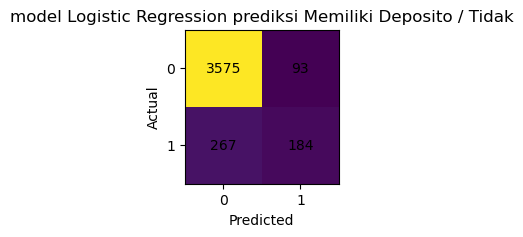

In [93]:
def visualCM(df_baf2_target, pred_target, total_label=2, title=""):
  cm = confusion_matrix(df_baf2_target, pred_target)
  fig, ax = plt.subplots(figsize=(total_label, total_label))
  ax.imshow(cm)
  ax.grid(False)
  ticks = range(0, total_label)
  ax.xaxis.set(ticks=ticks, ticklabels=ticks)
  ax.yaxis.set(ticks=ticks, ticklabels=ticks)
  ax.set_ylim(total_label-0.5, -0.5)
  for i in range(total_label):
      for j in range(total_label):
          ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
  plt.title(title)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

visualCM(df_test_target, pred_target, 2, "model Logistic Regression prediksi Memiliki Deposito / Tidak")

# Kesimpulan 1 Logistic Regression (Data Bank Additional)

- terdapat 3.575 + 93 = 3.668 orang tidak memiliki deposito
- model menebak sebanyak 3.575 orang yang tidak memiliki deposito ( 3.575 / 3.668 = 0.93) atau 97% nilai recall
- precision 0.93 artinya model dapat menebak sebesar 93% orang yang tidak memiliki deposito
- hasil akhir F1-score (nilai akurasi) sebesar 0.91 atau 91%


In [94]:
df_test2_fitur = df_test2.drop(columns='y')
df_test2_target = df_test2['y']

test_target = model_LR.predict(df_test2_fitur)


model_KNN = KNeighborsClassifier(n_neighbors=3)
model_KNN.fit(df_test2_fitur, df_test2_target)



KNeighborsClassifier(n_neighbors=3)

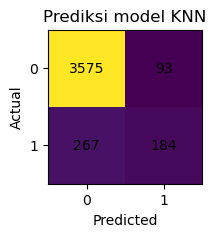

In [95]:
visualCM(df_test2_target, test_target, 2, "Prediksi model KNN")

In [96]:
print(classification_report(df_test2_target, test_target))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3668
           1       0.66      0.41      0.51       451

    accuracy                           0.91      4119
   macro avg       0.80      0.69      0.73      4119
weighted avg       0.90      0.91      0.90      4119



# Kesimpulan 2 Model KNN (Data Bank testing)

- sebanyak 3.668 data yang tidak punya deposito
- model KNN menebak 3575 + 267 orang yang tidak memiliki deposito, atau 3.575 menebak benar, dan 267 salah
- nilai precision untuk yang tidak memiliki deposito sebesar 0.91
- sebanyak 184 orang memiliki deposito dengan nilai precision sebesar 0.66 
- Data Training dan Data Testing dapat digunakan untuk model ML tersebut

In [98]:
model_svc = SVC()
model_svc.fit(df_train_fitur, df_train_target)

SVC()

In [102]:
y_pred = model_svc.predict(df_test_fitur)
print(classification_report(df_test_target, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      3668
           1       0.63      0.23      0.34       451

    accuracy                           0.90      4119
   macro avg       0.77      0.61      0.64      4119
weighted avg       0.88      0.90      0.88      4119



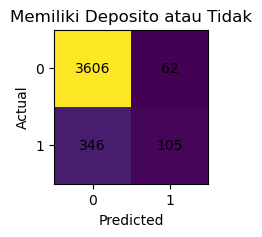

In [103]:
visualCM(df_test_target, y_pred, 2, "Memiliki Deposito atau Tidak")